Voici notre projet :)

In [73]:
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import numpy as np

filename = "Commandes_clients.csv"
df = pd.read_csv(filename)

idselect = 5

print(df.head(30))

    IdCommande  IdClient  IdProduit  Date  Quantite
0            1        75          5  1995        50
1            2        75          6  1996       175
2            3        75          1  1996       225
3            4        75          7  1996       150
4            5        75          5  1997        25
5            6        75          1  1998        25
6            7        75         10  1998        75
7            8        75          3  1998       175
8            9        75          9  1998       150
9           10        75          8  1999       225
10          11        75          6  2000        25
11          12        75          2  2000       200
12          13        85          2  2001        25
13          14        85          8  2001       150
14          15        85          1  2001        75
15          16        85          8  2001       250
16          17        35          9  2001       175
17          18        35          3  2001       225
18          

In [74]:
remises = [70, 40, 20, 20, 20, 60, 40, 30, 10, 60, 80, 30]
produit = [ 6,  6,  7,  2,  8,  3,  8,  5,  1, 10,  3,  5]
client =  [75, 14, 35, 38, 75, 15,  5, 98, 87, 54, 75, 25]
df_remises = pd.DataFrame({'Remise': remises,'IdProduit': produit, 'IdClient': client})
print(df_remises.head(12))

    Remise  IdProduit  IdClient
0       70          6        75
1       40          6        14
2       20          7        35
3       20          2        38
4       20          8        75
5       60          3        15
6       40          8         5
7       30          5        98
8       10          1        87
9       60         10        54
10      80          3        75
11      30          5        25


In [75]:
prix =      [83, 24, 34, 95, 82,  3, 18, 29, 95, 63]
marge =     [ 3, 10,  2,  6,  8, 50,  8, 20, 11, 20]
Idproduit = [i for i in range(1, 11)]
df_produit = pd.DataFrame({'Prix': prix,'Marge': marge}, index=Idproduit)
print(df_produit.head(10))

    Prix  Marge
1     83      3
2     24     10
3     34      2
4     95      6
5     82      8
6      3     50
7     18      8
8     29     20
9     95     11
10    63     20


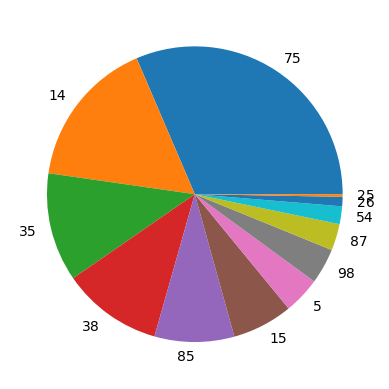

In [76]:
cost = [df["Quantite"][i]*df_produit["Prix"][df["IdProduit"][i]] for i in df.index]

df["Cost"] = cost

df_importance = df.groupby(["IdClient"]).sum().sort_values(by="Cost", ascending=False)

total = df["Cost"].sum()

plt.pie(df_importance["Cost"], labels = list(df_importance.index))
plt.show()

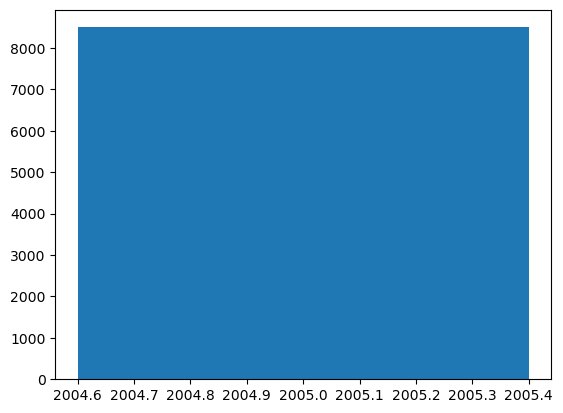

In [77]:
df_client = df[df["IdClient"]==idselect]

df_histo = df_client.groupby(["Date"]).sum().sort_values(by="Date", ascending=True)
plt.bar(height = df_histo["Cost"], x = list(df_histo.index))
plt.show()

In [78]:
df_remisesClient = df_remises[df_remises["IdClient"]==idselect]
print("Pour le client n°", idselect)
for i in list(df_remisesClient.index):
    print("Remise de {}% sur le produit n°{}".format(df_remisesClient["Remise"][i], df_remisesClient["IdProduit"][i]))

Pour le client n° 5
Remise de 40% sur le produit n°8


In [79]:
best = [-1, -1]
score_max = 0

df_clientPProduit = df_client.groupby(["IdProduit"]).sum()

for i in list(df_client.index):
    if not(df_client["IdProduit"][i] in df_remisesClient["IdProduit"]):
        if df_produit["Marge"][df_client["IdProduit"][i]] > 11:
            margeP = df_produit["Marge"][df_client["IdProduit"][i]]
            qteP = df_clientPProduit["Quantite"][df_client["IdProduit"][i]]
            prixP = df_produit["Prix"][df_client["IdProduit"][i]]
            score = margeP * qteP * prixP
            if score > score_max:
                score_max = score
                propRemise = rd.randint(1, int(df_produit["Marge"][df_client["IdProduit"][i]]/10)-1)
                best = [df_client["IdProduit"][i], propRemise * 10]

if score_max != 0:
    print("Remise avantageuse détectée !")
    print("Conseil : accordez {}% de remise au client n°{} sur le produit n°{}, afin de le fidéliser !".format(best[1], idselect, best[0]))
else:
    print("Pas de remise suggérée... :(")

Pas de remise suggérée... :(
